# 1. Perkenalan Dataset

Dataset ini memberikan gambaran menyeluruh tentang berbagai faktor yang memengaruhi kinerja siswa dalam ujian. Termasuk informasi tentang kebiasaan belajar, kehadiran, keterlibatan orang tua, dan aspek lain yang memengaruhi keberhasilan akademis.

## Deskripsi Kolom

|Atribut| Deskripsi |
|--|--|
| Hours_Studied | Jumlah jam yang dihabiskan untuk belajar per minggu. |
| Attendance | Persentase kelas yang dihadiri. |
| Parental_Involvement | Tingkat keterlibatan orang tua dalam pendidikan siswa (Low, Medium, High). |
| Access_to_Resources | Ketersediaan sumber daya pendidikan (Low, Medium, High). |
| Extracurricular_Activities | Partisipasi dalam kegiatan ekstrakurikuler (Ya, Tidak). |
| Sleep_Hours | Rata-rata jumlah jam tidur per malam. |
| Previous_Scores | Nilai ujian sebelumnya |
| Motivation_Level | Tingkat motivasi siswa (Low, Medium, High). |
| Internet_Access | Ketersediaan akses internet (Yes, No). |
| Tutoring_Sessions | Jumlah sesi bimbingan belajar yang dihadiri per bulan. |
| Family_Income | Tingkat pendapatan keluarga (Low, Medium, High). |
| Teacher_Quality | Kualitas Guru (Low, Medium, High) |
| School_Type | Jenis sekolah yang dihadiri (Public, Private) |
| Peer_Influence | Pengaruh teman sebaya terhadap prestasi akademik (Positive, Neutral, Negative) |
| Physical_Activity | Rata-rata jumlah jam aktivitas fisik per minggu. |
| Learning_Disabilities | Adanya kesulitan belajar (Yes, No). |
| Parental_Education_Level | Tingkat pendidikan tertinggi orang tua (High School, College, Postgraduate). |
| Distance_from_Home | Jarak dari rumah ke sekolah (Near, Moderate, Far). |
| Gender | Jenis kelamin siswa (Male, Female). |
| Exam_Score | Nilai ujian akhir. |


# 2. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

# 3. Memuat Dataset

In [2]:
ds = pd.read_csv('Dataset_inisiasi.csv')
ds.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# 4. Exploratory Data Analysis (EDA)

In [3]:
# membuat salinan dataset
ds_cleaned = ds.copy()

## 1. Memahami Struktur Data

In [4]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
ds_cleaned.info() 
ds_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(6607, 20)

Dataset ini memiliki **6607 baris** data, dan **20 kolom**

In [5]:
numerical_cols = ds_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = ds_cleaned.select_dtypes(include=['object']).columns.tolist()

print(f'Jumlah Fitur: {len(categorical_cols) + len(numerical_cols)}')
print(f'Jumlah fitur numerik: {len(numerical_cols)}')
print(f'Jumlah fitur kategorikal: {len(categorical_cols)}\n')
print(f'Daftar fitur kategorikal:\n{categorical_cols}\n')
print(f'Daftar fitur numerikal:\n{numerical_cols}')

Jumlah Fitur: 20
Jumlah fitur numerik: 7
Jumlah fitur kategorikal: 13

Daftar fitur kategorikal:
['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Daftar fitur numerikal:
['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


## 2. Menangani Data yang Hilang

In [6]:
missing_values = ds_cleaned.isnull().sum()
percentage_missing_values = (missing_values / ds_cleaned.shape[0]) * 100

print(f'Total nilai yang kosong: {missing_values.sum()}')
print(f'Persentase nilai yang kosong: {percentage_missing_values.sum():.2f}%\n')

missing_values_ds = pd.DataFrame(percentage_missing_values[missing_values>0], columns=['percentage_missing_values'])
missing_values_ds['number_of_missing_values'] = missing_values[missing_values>0]

missing_values_ds

Total nilai yang kosong: 235
Persentase nilai yang kosong: 3.56%



,percentage_missing_values,number_of_missing_values
Teacher_Quality,1.180566,78
Parental_Education_Level,1.362192,90
Distance_from_Home,1.014076,67


<Axes: >

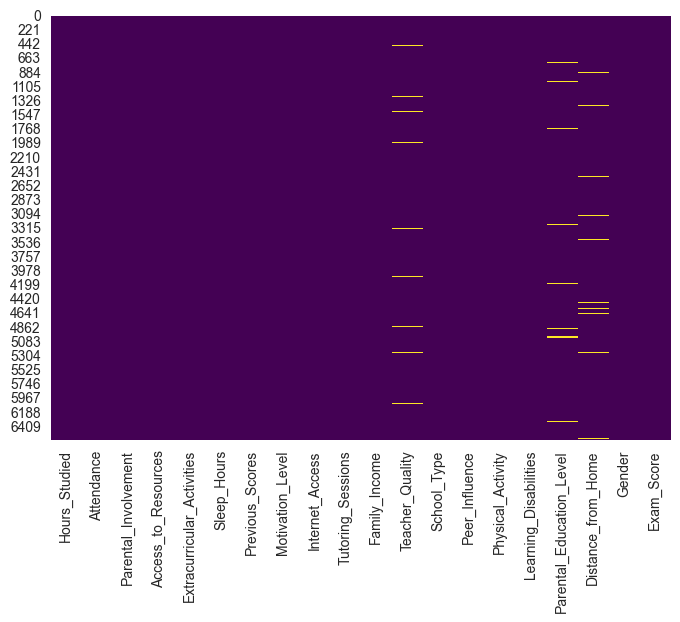

In [7]:
sns.heatmap(ds.isnull(), cbar=False, cmap='viridis')

In [8]:
# Drop the null values
ds_cleaned.dropna(axis=0, inplace=True)

missing_values = ds_cleaned.isnull().sum()
percentage_missing_values = (missing_values / ds_cleaned.shape[0]) * 100

print(f'Total nilai yang kosong: {missing_values.sum()}')
print(f'Persentase nilai yang kosong: {percentage_missing_values.sum():.2f}%\n')

missing_values_ds = pd.DataFrame(percentage_missing_values[missing_values>0], columns=['percentage_missing_values'])
missing_values_ds['number_of_missing_values'] = missing_values[missing_values>0]

missing_values_ds

Total nilai yang kosong: 0
Persentase nilai yang kosong: 0.00%



,percentage_missing_values,number_of_missing_values


Diketahui data yang hilang sebanyak 3.56% saja. Karena data yang hilang adalah kecil, jadi saya akan menangani data yang hilang dengan teknik drop pada baris yang memiliki data yang hilang.

## 3. Analisis Distribusi, Visualisasi, dan Korelasi

In [9]:
# Menampilkan statistik deskriptif dari dataset
ds_cleaned.describe(include="all")

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378,6378,6378,6378.000000,6378.000000,6378,6378,6378.000000,6378,6378,6378,6378,6378.000000,6378,6378,6378,6378,6378.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3251,3204,3807,NaN,NaN,3237,5893,NaN,2582,3826,4434,2553,NaN,5710,3159,3801,3688,NaN
mean,19.977109,80.020853,NaN,NaN,NaN,7.034964,75.066165,NaN,NaN,1.495296,NaN,NaN,NaN,NaN,2.972719,NaN,NaN,NaN,NaN,67.252117
std,5.985460,11.550723,NaN,NaN,NaN,1.468033,14.400389,NaN,NaN,1.233984,NaN,NaN,NaN,NaN,1.028926,NaN,NaN,NaN,NaN,3.914217
min,1.000000,60.000000,NaN,NaN,NaN,4.000000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.000000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.000000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.000000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


In [10]:
# Menampilkan statistik deskriptif dari dataset yang hanya berisi fitur numerik
stat_desc_num = ds_cleaned[numerical_cols].describe().T
stat_desc_num

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


Berdasarkan output statistik deskriptif dari fitur numerik pada dataset, berikut adalah beberapa analisis yang dapat dilakukan:

1. **Hours_Studied (Jam Belajar)**
    - Rata-rata jam belajar siswa per minggu adalah sekitar 19.98 jam.
    - Jam belajar minimum adalah 1 jam dan maksimum adalah 44 jam.
    - Sebagian besar siswa belajar antara 16 hingga 24 jam per minggu (kuartil pertama hingga ketiga).

2. **Attendance (Kehadiran)**
    - Rata-rata persentase kehadiran siswa adalah sekitar 80.02%.
    - Persentase kehadiran minimum adalah 60% dan maksimum adalah 100%.
    - Sebagian besar siswa memiliki persentase kehadiran antara 70% hingga 90%.

3. **Sleep_Hours (Jam Tidur)**
    - Rata-rata jam tidur siswa per malam adalah sekitar 7.03 jam.
    - Jam tidur minimum adalah 4 jam dan maksimum adalah 10 jam.
    - Sebagian besar siswa tidur antara 6 hingga 8 jam per malam.

4. **Previous_Scores (Nilai Sebelumnya)**
    - Rata-rata nilai ujian sebelumnya adalah sekitar 75.07.
    - Nilai ujian sebelumnya minimum adalah 50 dan maksimum adalah 100.
    - Sebagian besar siswa memiliki nilai ujian sebelumnya antara 63 hingga 88.

5. **Tutoring_Sessions (Sesi Bimbingan)**
    - Rata-rata jumlah sesi bimbingan belajar yang dihadiri siswa per bulan adalah sekitar 1.50 sesi.
    - Jumlah sesi bimbingan minimum adalah 0 dan maksimum adalah 8 sesi.
    - Sebagian besar siswa menghadiri antara 1 hingga 2 sesi bimbingan per bulan.

6. **Physical_Activity (Aktivitas Fisik)**
    - Rata-rata jumlah jam aktivitas fisik siswa per minggu adalah sekitar 2.97 jam.
    - Jumlah jam aktivitas fisik minimum adalah 0 dan maksimum adalah 6 jam.
    - Sebagian besar siswa melakukan aktivitas fisik antara 2 hingga 4 jam per minggu.

7. **Exam_Score (Nilai Ujian)**
    - Rata-rata nilai ujian akhir siswa adalah sekitar 67.25.
    - Nilai ujian minimum adalah 55 dan maksimum adalah 101. Nilai maksimum akan diganti dengan 100, karena mungkin terjadi human error saat menginput nilai siswa.
    - Sebagian besar siswa memiliki nilai ujian antara 65 hingga 69.

Dari analisis ini, kita dapat melihat distribusi dan rentang nilai dari setiap fitur numerik dalam dataset. Informasi ini dapat membantu dalam memahami karakteristik data dan mengidentifikasi potensi anomali atau outlier yang mungkin memerlukan perhatian lebih lanjut.

In [11]:
# mengganti nilai 101 menjadi 100 pada Exam_Score
ds_cleaned['Exam_Score'] = ds_cleaned['Exam_Score'].replace(101, 100)

# cek kembali data tipe numerikal
ds_cleaned[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.251960,3.912884,55.0,65.0,67.0,69.0,100.0


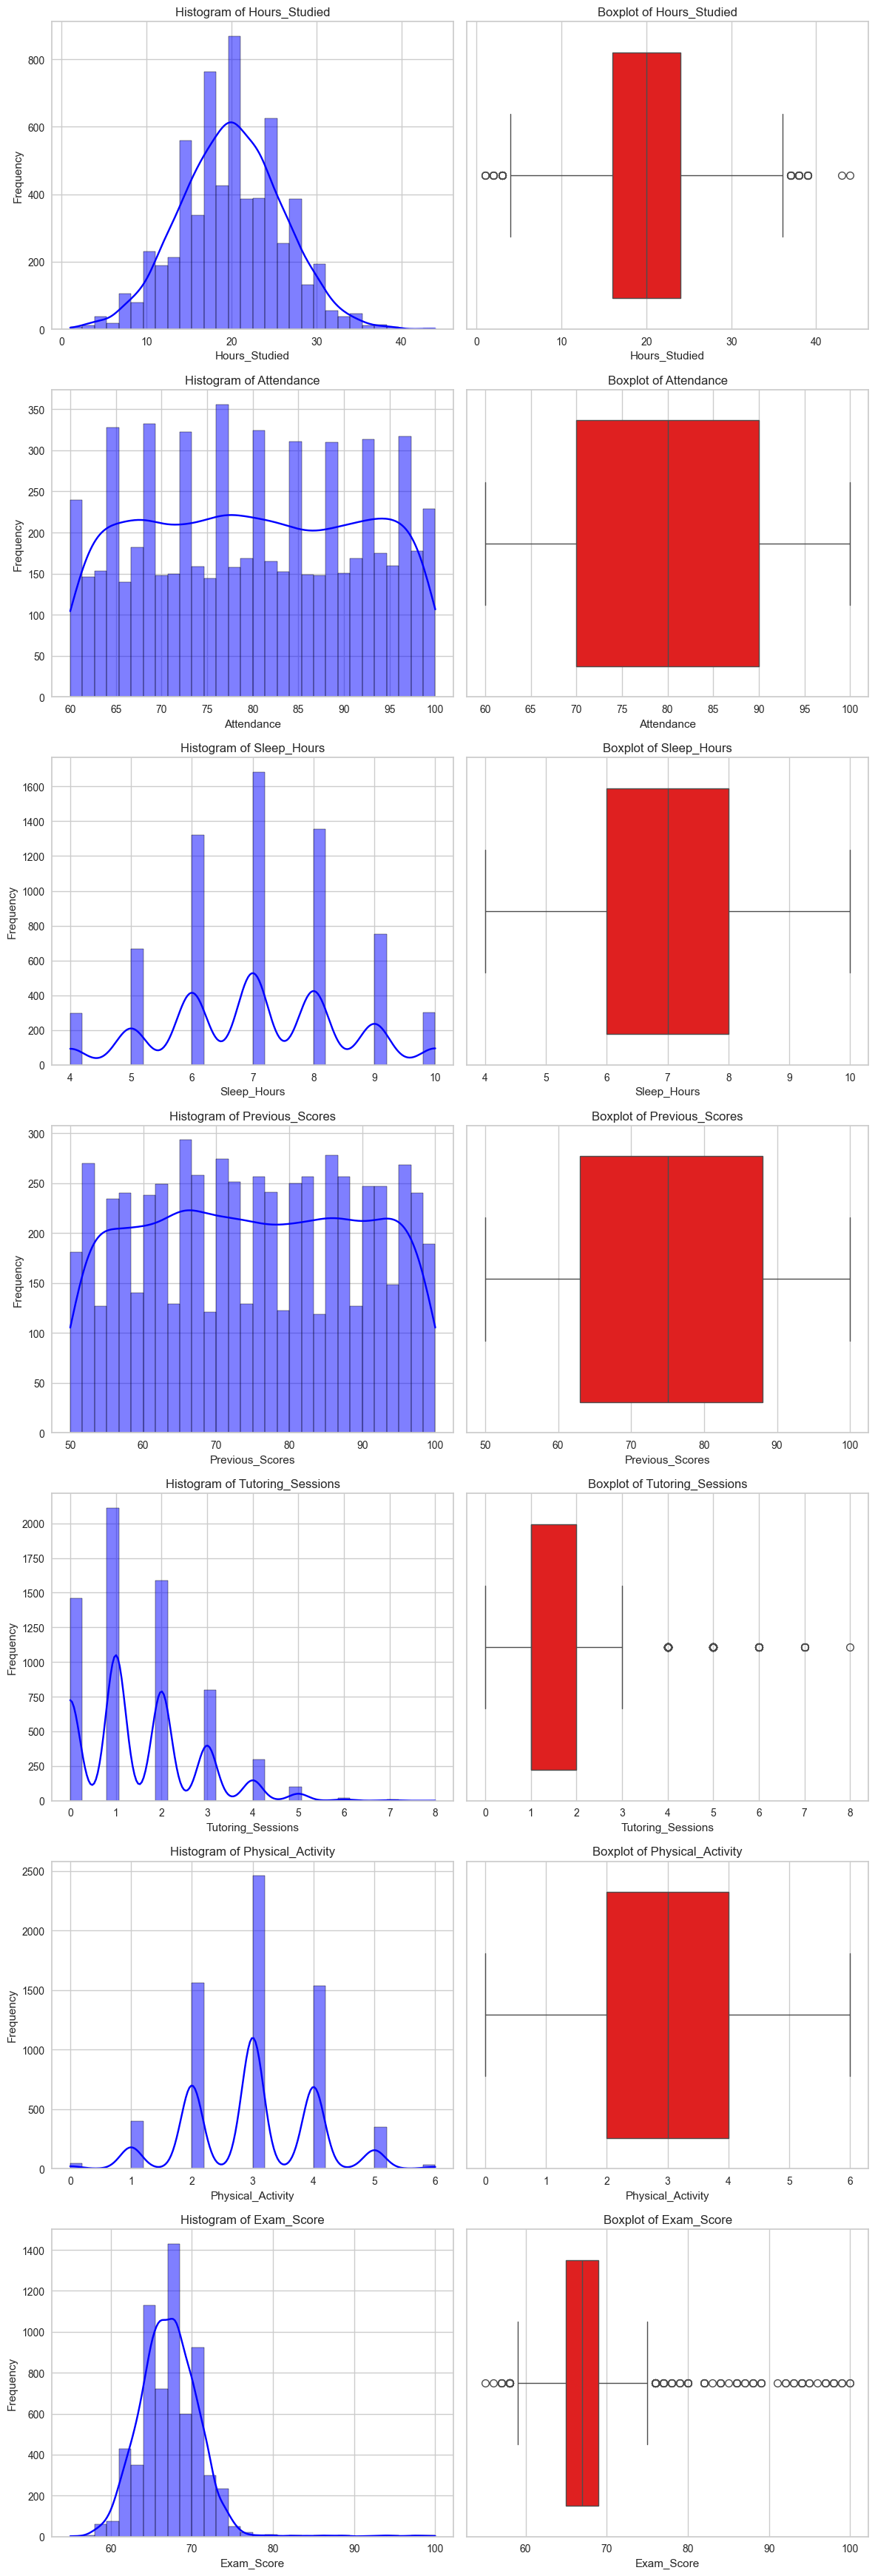

In [12]:
# Menampilkan histogram dan plotbox distribusi dari fitur numerik
def plt_histogram_boxplot(ds_cleaned, columns=None, bins=30):
    
    if columns is None:
        columns = ds_cleaned.select_dtypes(include=['number']).columns
    
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 5 * num_cols))
    for i, col in enumerate(columns):
        
        sns.histplot(ds_cleaned[col], bins=bins, kde=True, ax=axes[i, 0], color="blue")
        axes[i, 0].set_title(f'Histogram of {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frequency')
        
        sns.boxplot(x=ds_cleaned[col], ax=axes[i, 1], color="red")
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

histo_box = plt_histogram_boxplot(ds_cleaned)
histo_box

Berdasarkan hasil gambar histogram dan boxplot dari fitur-fitur numerik, berikut adalah analisis rentang nilai, kecenderungan pusat, potensi outliers, serta potensi skewness yang ada:

1. **Hours_Studied (Jam Belajar)**
    - **Rentang Nilai**: 1 hingga 44 jam per minggu.
    - **Kecenderungan Pusat**: Rata-rata sekitar 20 jam per minggu.
    - **Potensi Outliers**: Ada beberapa outliers di atas 40 jam per minggu.
    - **Potensi Skewness**: Distribusi cenderung sedikit skewed ke kanan (positif skewness).

2. **Attendance (Kehadiran)**
    - **Rentang Nilai**: 60% hingga 100%.
    - **Kecenderungan Pusat**: Rata-rata sekitar 80%.
    - **Potensi Outliers**: Tidak ada outliers yang signifikan.
    - **Potensi Skewness**: Distribusi cenderung normal.

3. **Sleep_Hours (Jam Tidur)**
    - **Rentang Nilai**: 4 hingga 10 jam per malam.
    - **Kecenderungan Pusat**: Rata-rata sekitar 7 jam per malam.
    - **Potensi Outliers**: Tidak ada outliers yang signifikan.
    - **Potensi Skewness**: Distribusi cenderung normal.

4. **Previous_Scores (Nilai Sebelumnya)**
    - **Rentang Nilai**: 50 hingga 100.
    - **Kecenderungan Pusat**: Rata-rata sekitar 75.
    - **Potensi Outliers**: Tidak ada outliers yang signifikan.
    - **Potensi Skewness**: Distribusi cenderung normal.

5. **Tutoring_Sessions (Sesi Bimbingan)**
    - **Rentang Nilai**: 0 hingga 8 sesi per bulan.
    - **Kecenderungan Pusat**: Rata-rata sekitar 1.5 sesi per bulan.
    - **Potensi Outliers**: Ada beberapa outliers di atas 6 sesi per bulan.
    - **Potensi Skewness**: Distribusi cenderung skewed ke kanan (positif skewness).

6. **Physical_Activity (Aktivitas Fisik)**
    - **Rentang Nilai**: 0 hingga 6 jam per minggu.
    - **Kecenderungan Pusat**: Rata-rata sekitar 3 jam per minggu.
    - **Potensi Outliers**: Tidak ada outliers yang signifikan.
    - **Potensi Skewness**: Distribusi cenderung normal.

7. **Exam_Score (Nilai Ujian)**
    - **Rentang Nilai**: 55 hingga 100.
    - **Kecenderungan Pusat**: Rata-rata sekitar 67.
    - **Potensi Outliers**: Ada beberapa outliers di bawah 60 dan di atas 90.
    - **Potensi Skewness**: Distribusi cenderung sedikit skewed ke kiri (negatif skewness).

Secara keseluruhan, sebagian besar fitur numerik memiliki distribusi yang cukup normal dengan beberapa outliers yang perlu diperhatikan, terutama pada fitur `Hours_Studied`, `Tutoring_Sessions`, dan `Exam_Score`. Outliers ini dapat mempengaruhi analisis lebih lanjut dan mungkin memerlukan penanganan khusus. Potensi skewness juga perlu diperhatikan karena dapat mempengaruhi hasil analisis statistik dan model prediktif.

In [13]:
cat_desc = ds_cleaned[categorical_cols].describe().T
cat_desc['freq_percentage(%)'] = cat_desc['freq'] / ds_cleaned.shape[0] * 100
cat_desc

,count,unique,top,freq,freq_percentage(%)
Parental_Involvement,6378,3,Medium,3251,50.972092
Access_to_Resources,6378,3,Medium,3204,50.235183
Extracurricular_Activities,6378,2,Yes,3807,59.689558
Motivation_Level,6378,3,Medium,3237,50.752587
Internet_Access,6378,2,Yes,5893,92.395735
Family_Income,6378,3,Low,2582,40.48291
Teacher_Quality,6378,3,Medium,3826,59.987457
School_Type,6378,2,Public,4434,69.520226
Peer_Influence,6378,3,Positive,2553,40.028222
Learning_Disabilities,6378,2,No,5710,89.526497


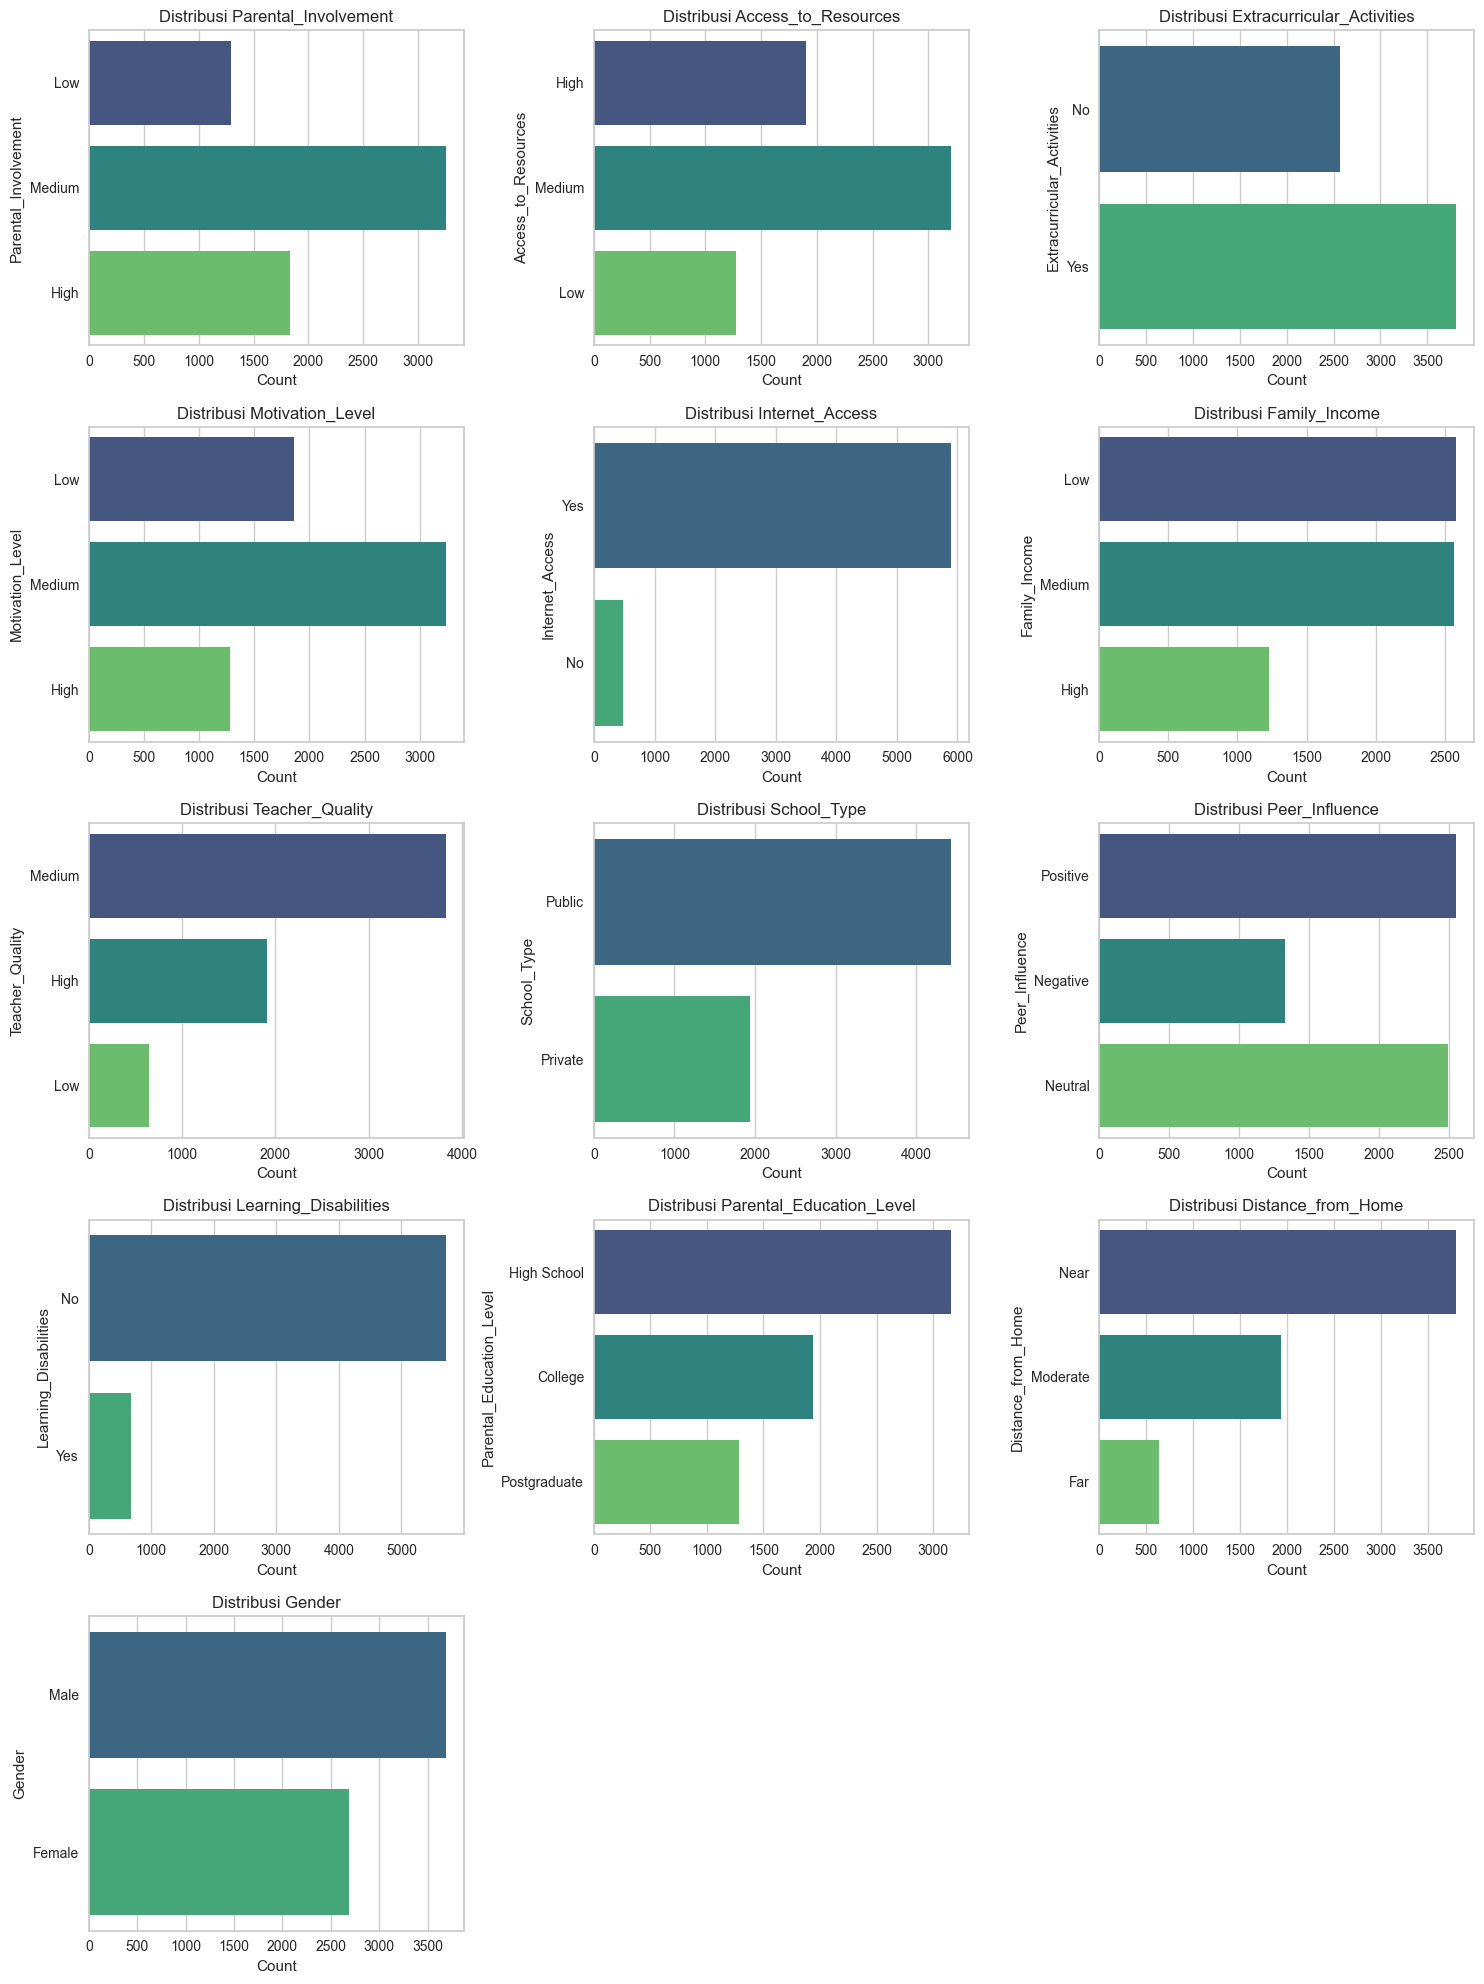

In [14]:
# Visualisasi distribusi untuk variabel kategorikal
plt_cat = plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(y=ds_cleaned[column], palette='viridis')
    plt.title(f'Distribusi {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
plt.tight_layout()

plt_cat.show()

Berdasarkan hasil visualisasi distribusi untuk variabel kategorikal, berikut adalah analisisnya:

1. **Parental_Involvement (Keterlibatan Orang Tua)**
    - Distribusi keterlibatan orang tua menunjukkan bahwa sebagian besar siswa memiliki tingkat keterlibatan orang tua yang sedang (Medium).

2. **Access_to_Resources (Akses ke Sumber Daya)**
    - Sebagian besar siswa memiliki akses ke sumber daya pendidikan yang sedang (Medium).

3. **Extracurricular_Activities (Kegiatan Ekstrakurikuler)**
    - Sebagian besar siswa berpartisipasi dalam kegiatan ekstrakurikuler (Yes).
    - Jumlah siswa yang tidak berpartisipasi dalam kegiatan ekstrakurikuler (No) lebih sedikit.

4. **Motivation_Level (Tingkat Motivasi)**
    - Sebagian besar siswa memiliki tingkat motivasi yang sedang (Medium).

5. **Internet_Access (Akses Internet)**
    - Sebagian besar siswa memiliki akses internet (Yes).
    - Jumlah siswa yang tidak memiliki akses internet (No) lebih sedikit.

6. **Family_Income (Pendapatan Keluarga)**
    - Sebagian besar siswa berasal dari keluarga dengan pendapatan sedang (Medium).

7. **Teacher_Quality (Kualitas Guru)**
    - Sebagian besar siswa menilai kualitas guru mereka sebagai sedang (Medium).

8. **School_Type (Jenis Sekolah)**
    - Sebagian besar siswa bersekolah di sekolah umum (Public).
    - Jumlah siswa yang bersekolah di sekolah privat (Private) lebih sedikit.

9. **Peer_Influence (Pengaruh Teman Sebaya)**
    - Sebagian besar siswa memiliki pengaruh teman sebaya yang positif (Positive).
    - Pengaruh teman sebaya yang netral (Neutral) dan negatif (Negative) memiliki jumlah yang hampir sama.

10. **Learning_Disabilities (Kesulitan Belajar)**
    - Sebagian besar siswa tidak memiliki kesulitan belajar (No).
    - Jumlah siswa yang memiliki kesulitan belajar (Yes) lebih sedikit.

11. **Parental_Education_Level (Tingkat Pendidikan Orang Tua)**
    - Sebagian besar siswa memiliki orang tua dengan tingkat pendidikan sekolah menengah (High School).

12. **Distance_from_Home (Jarak dari Rumah)**
    - Sebagian besar siswa tinggal dekat dengan sekolah (Near).

13. **Gender (Jenis Kelamin)**
    - Distribusi jenis kelamin siswa menunjukkan jumlah yang hampir seimbang antara laki-laki (Male) dan perempuan (Female).

Secara keseluruhan, distribusi variabel kategorikal menunjukkan bahwa sebagian besar siswa memiliki karakteristik yang sedang (Medium) dalam berbagai aspek seperti keterlibatan orang tua, akses ke sumber daya, motivasi, pendapatan keluarga, kualitas guru, dan pengaruh teman sebaya. Selain itu, sebagian besar siswa memiliki akses internet, berpartisipasi dalam kegiatan ekstrakurikuler, tidak memiliki kesulitan belajar, dan tinggal dekat dengan sekolah.

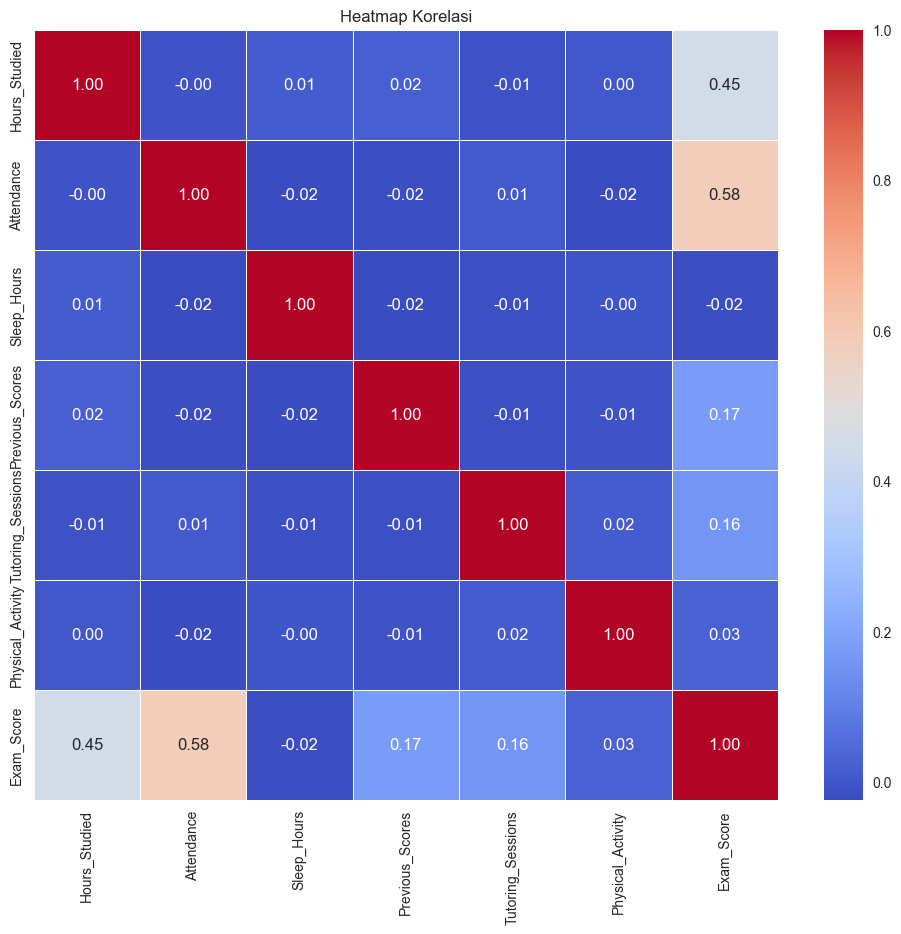

In [15]:
# Heatmap korelasi untuk fitur numerik
plt_corr_matrix = plt.figure(figsize=(12, 10))
correlation = ds_cleaned[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Berdasarkan hasil visualisasi matriks korelasi dari fitur numerik, berikut adalah beberapa analisis yang dapat dilakukan:

1. **Hours_Studied (Jam Belajar)**
    - Korelasi positif yang cukup kuat dengan `Exam_Score` (0.45). Ini menunjukkan bahwa semakin banyak jam belajar siswa, semakin tinggi nilai ujian mereka.

2. **Attendance (Kehadiran)**
    - Korelasi positif yang cukup kuat dengan `Exam_Score` (0.58). Ini menunjukkan bahwa semakin tinggi persentase kehadiran siswa, semakin tinggi nilai ujian mereka.

3. **Sleep_Hours (Jam Tidur)**
    - Korelasi yang sangat lemah dengan semua fitur lainnya, termasuk `Exam_Score` (-0.02). Ini menunjukkan bahwa jumlah jam tidur siswa tidak memiliki pengaruh signifikan terhadap nilai ujian mereka.

4. **Previous_Scores (Nilai Sebelumnya)**
    - Korelasi positif yang lemah dengan `Exam_Score` (0.18). Ini menunjukkan bahwa nilai ujian sebelumnya memiliki sedikit pengaruh terhadap nilai ujian akhir siswa.

5. **Tutoring_Sessions (Sesi Bimbingan)**
    - Korelasi positif yang lemah dengan `Exam_Score` (0.16). Ini menunjukkan bahwa jumlah sesi bimbingan belajar yang dihadiri siswa memiliki sedikit pengaruh terhadap nilai ujian mereka.

6. **Physical_Activity (Aktivitas Fisik)**
    - Korelasi yang sangat lemah dengan semua fitur lainnya, termasuk `Exam_Score` (0.03). Ini menunjukkan bahwa jumlah jam aktivitas fisik siswa tidak memiliki pengaruh signifikan terhadap nilai ujian mereka.

7. **Exam_Score (Nilai Ujian)**
    - Korelasi positif yang cukup kuat dengan `Hours_Studied` (0.45) dan `Attendance` (0.58). Ini menunjukkan bahwa jam belajar dan kehadiran adalah faktor penting yang mempengaruhi nilai ujian siswa.

Secara keseluruhan, dari matriks korelasi ini dapat disimpulkan bahwa `Hours_Studied` dan `Attendance` adalah dua fitur yang memiliki korelasi positif yang cukup kuat dengan `Exam_Score`. Fitur-fitur lainnya memiliki korelasi yang lemah atau sangat lemah dengan `Exam_Score`, menunjukkan bahwa mereka mungkin tidak memiliki pengaruh signifikan terhadap nilai ujian siswa.

## Insight EDA

Berikut adalah beberapa insight yang diperoleh dari tahap Exploratory Data Analysis (EDA) pada notebook ini:

1. **Distribusi Fitur Numerik**:
    - **Hours_Studied (Jam Belajar)**: Rata-rata siswa belajar sekitar 20 jam per minggu. Terdapat beberapa outliers yang belajar lebih dari 40 jam per minggu.
    - **Attendance (Kehadiran)**: Rata-rata kehadiran siswa adalah 80%. Sebagian besar siswa memiliki kehadiran antara 70% hingga 90%.
    - **Sleep_Hours (Jam Tidur)**: Rata-rata siswa tidur sekitar 7 jam per malam. Distribusi jam tidur cenderung normal tanpa outliers signifikan.
    - **Previous_Scores (Nilai Sebelumnya)**: Rata-rata nilai ujian sebelumnya adalah 75. Distribusi nilai cenderung normal tanpa outliers signifikan.
    - **Tutoring_Sessions (Sesi Bimbingan)**: Rata-rata siswa menghadiri sekitar 1.5 sesi bimbingan per bulan. Terdapat beberapa outliers yang menghadiri lebih dari 6 sesi per bulan.
    - **Physical_Activity (Aktivitas Fisik)**: Rata-rata siswa melakukan aktivitas fisik sekitar 3 jam per minggu. Distribusi aktivitas fisik cenderung normal tanpa outliers signifikan.
    - **Exam_Score (Nilai Ujian)**: Rata-rata nilai ujian akhir siswa adalah 67. Terdapat beberapa outliers di bawah 60 dan di atas 90.

2. **Distribusi Fitur Kategorikal**:
    - Sebagian besar siswa memiliki tingkat keterlibatan orang tua, akses ke sumber daya, motivasi, pendapatan keluarga, dan kualitas guru yang sedang (Medium).
    - Sebagian besar siswa memiliki akses internet, berpartisipasi dalam kegiatan ekstrakurikuler, tidak memiliki kesulitan belajar, dan tinggal dekat dengan sekolah.
    - Distribusi jenis kelamin siswa menunjukkan jumlah yang hampir seimbang antara laki-laki dan perempuan.

3. **Korelasi Antar Fitur**:
    - **Hours_Studied (Jam Belajar)** dan **Attendance (Kehadiran)** memiliki korelasi positif yang cukup kuat dengan **Exam_Score (Nilai Ujian)**. Ini menunjukkan bahwa semakin banyak jam belajar dan semakin tinggi kehadiran siswa, semakin tinggi nilai ujian mereka.
    - Fitur-fitur lainnya memiliki korelasi yang lemah atau sangat lemah dengan **Exam_Score**, menunjukkan bahwa mereka mungkin tidak memiliki pengaruh signifikan terhadap nilai ujian siswa.

4. **Penanganan Data yang Hilang**:
    - Data yang hilang hanya sebesar 3.56%, sehingga dilakukan teknik drop pada baris yang memiliki data yang hilang.

5. **Anomali Nilai**:
    - Terdapat anomali nilai maksimum pada **Exam_Score** yang mencapai 101. Nilai ini telah diganti menjadi 100 untuk mengatasi kemungkinan kesalahan input.

Insight-insight ini memberikan gambaran menyeluruh tentang karakteristik data dan hubungan antar fitur, yang dapat membantu dalam analisis lebih lanjut dan pembuatan model prediktif.

# 5. Data Preprocessing

## 1. Mengidentifikasi data duplikat

In [16]:
total_duplicated = ds_cleaned.duplicated().sum()

if total_duplicated > 0:
    print(f'Total baris duplikat: {total_duplicated}')
else:
    print(f'Total baris duplikat rows: {total_duplicated}')
    print(f'Tidak ada baris duplikat')

Total baris duplikat rows: 0
Tidak ada baris duplikat


## 2. Binning (Pengelompokan Data)

In [17]:
# Binning untuk Hours_Studied
bins_hours_studied = [0, 10, 30, 50]
labels_hours_studied = ['Low', 'Medium', 'High']
ds_cleaned['Hours_Studied_Binned'] = pd.cut(ds_cleaned['Hours_Studied'], bins=bins_hours_studied, labels=labels_hours_studied, include_lowest=True)

# Binning untuk Tutoring Sessions
bins_tutoring_sessions = [0, 2, 6, 8]
labels_tutoring_sessions = ['Low', 'Medium', 'High']
ds_cleaned['Tutoring_Sessions_Binned'] = pd.cut(ds_cleaned['Tutoring_Sessions'], bins=bins_tutoring_sessions, labels=labels_tutoring_sessions, include_lowest=True)

# Binning untuk Exam_Score
bins_exam_score = [0, 59, 69, 79, 100]
labels_exam_score = ['D', 'C', 'B', 'A']
ds_cleaned['Exam_Score_Binned'] = pd.cut(ds_cleaned['Exam_Score'], bins=bins_exam_score, labels=labels_exam_score, include_lowest=True)

# Menampilkan hasil binning
ds_cleaned[['Hours_Studied', 'Hours_Studied_Binned', 'Tutoring_Sessions', 'Tutoring_Sessions_Binned', 'Exam_Score', 'Exam_Score_Binned']].head()

,Hours_Studied,Hours_Studied_Binned,Tutoring_Sessions,Tutoring_Sessions_Binned,Exam_Score,Exam_Score_Binned
0,23,Medium,0,Low,67,C
1,19,Medium,2,Low,61,C
2,24,Medium,2,Low,74,B
3,29,Medium,1,Low,71,B
4,19,Medium,3,Medium,70,B


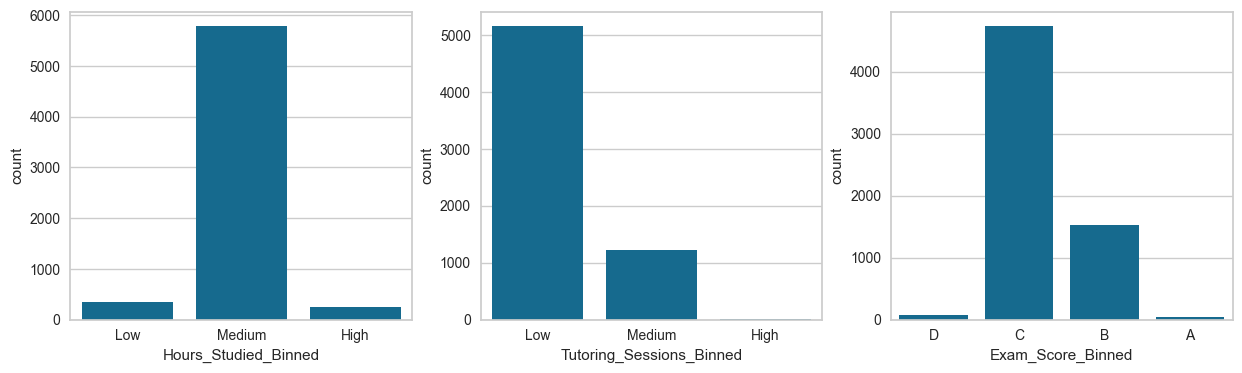

In [18]:
# visualisasi distribusi dari hasil binning
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)
axes = axes.flatten()

for i, col in enumerate(['Hours_Studied_Binned', 'Tutoring_Sessions_Binned', 'Exam_Score_Binned']):
    sns.countplot(x=col, data=ds_cleaned, ax=axes[i])


In [19]:
for col in ds_cleaned[categorical_cols].select_dtypes(['category']).columns:

    ds_cleaned[col] = ds_cleaned[col].astype('object')

## 3. Scaling

In [20]:
ds_scaled = ds_cleaned.copy()
scaler = MinMaxScaler()

ds_scaled[numerical_cols] = scaler.fit_transform(ds_cleaned[numerical_cols])
ds_scaled[numerical_cols]

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.266667
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.133333
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.422222
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.355556
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.333333
...,...,...,...,...,...,...,...
6602,0.558140,0.225,0.500000,0.52,0.125,0.333333,0.288889
6603,0.511628,0.400,0.666667,0.62,0.375,0.333333,0.311111
6604,0.441860,0.750,0.333333,0.30,0.375,0.333333,0.288889
6605,0.209302,0.650,0.333333,0.82,0.250,0.500000,0.288889


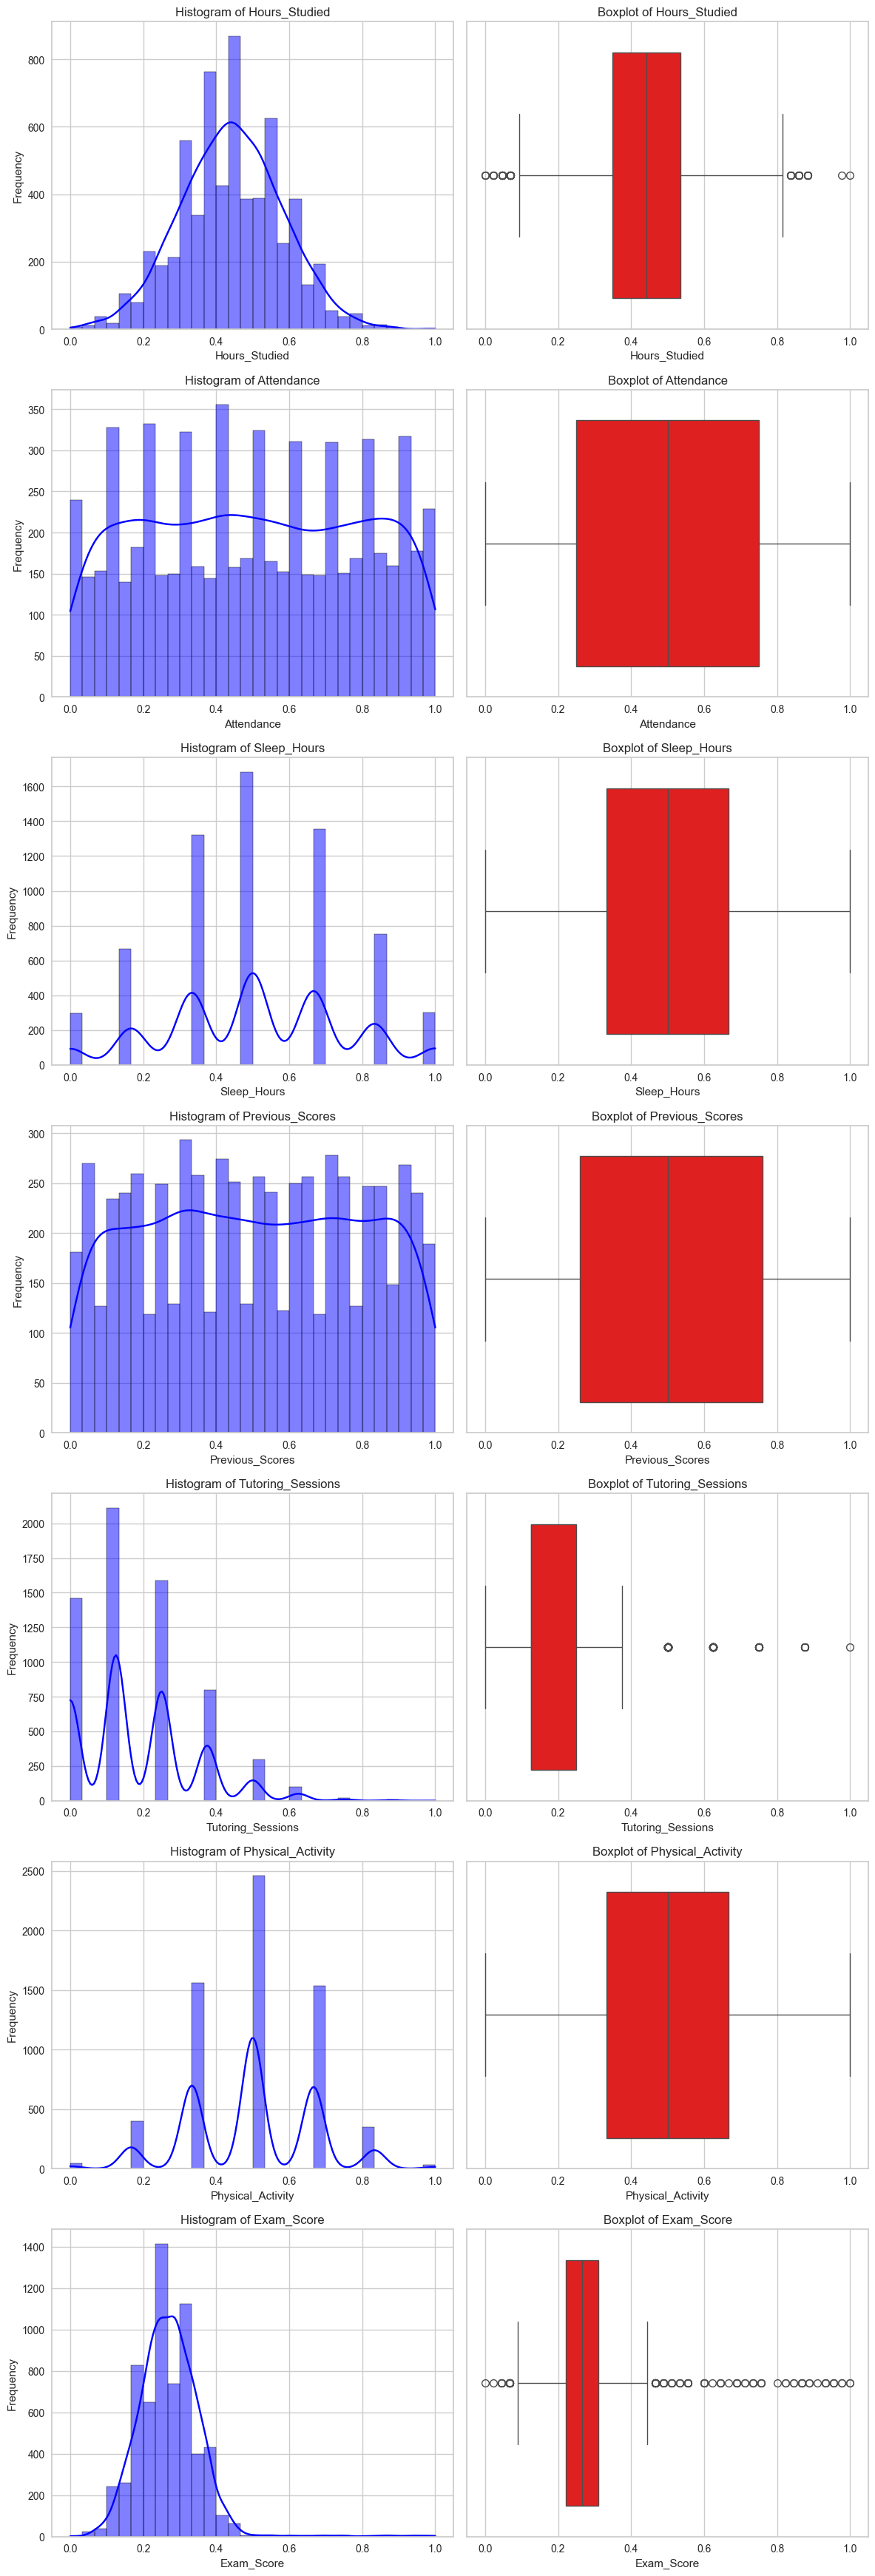

In [21]:
# Menampilkan histogram dan plotbox distribusi dari fitur numerik
def plt_histogram_boxplot(ds_cleaned, columns=None, bins=30):
    
    if columns is None:
        columns = ds_cleaned.select_dtypes(include=['number']).columns
    
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 5 * num_cols))
    for i, col in enumerate(columns):
        
        sns.histplot(ds_cleaned[col], bins=bins, kde=True, ax=axes[i, 0], color="blue")
        axes[i, 0].set_title(f'Histogram of {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frequency')
        
        sns.boxplot(x=ds_cleaned[col], ax=axes[i, 1], color="red")
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

plt_histogram_boxplot(ds_scaled)

In [22]:
ds_scaled[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,0.441328,0.139197,0.0,0.348837,0.441860,0.534884,1.0
Attendance,6378.0,0.500521,0.288768,0.0,0.250000,0.500000,0.750000,1.0
Sleep_Hours,6378.0,0.505827,0.244672,0.0,0.333333,0.500000,0.666667,1.0
Previous_Scores,6378.0,0.501323,0.288008,0.0,0.260000,0.500000,0.760000,1.0
Tutoring_Sessions,6378.0,0.186912,0.154248,0.0,0.125000,0.125000,0.250000,1.0
Physical_Activity,6378.0,0.495453,0.171488,0.0,0.333333,0.500000,0.666667,1.0
Exam_Score,6378.0,0.272266,0.086953,0.0,0.222222,0.266667,0.311111,1.0


Memang masih terdapat outliers pada data. Namun, outlier pada data ini bukanlah karena error, melainkan adalah sebuah informasi yang berguna, misalnya pada fitur Exam_Score nilai yang diatas 80 merupakan outlier. Jadi saya tidak akan membersihkan data outlier. 

## 4. Encoding Data Kategorikal

In [23]:
ds_scaled[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Parental_Involvement        6378 non-null   object
 1   Access_to_Resources         6378 non-null   object
 2   Extracurricular_Activities  6378 non-null   object
 3   Motivation_Level            6378 non-null   object
 4   Internet_Access             6378 non-null   object
 5   Family_Income               6378 non-null   object
 6   Teacher_Quality             6378 non-null   object
 7   School_Type                 6378 non-null   object
 8   Peer_Influence              6378 non-null   object
 9   Learning_Disabilities       6378 non-null   object
 10  Parental_Education_Level    6378 non-null   object
 11  Distance_from_Home          6378 non-null   object
 12  Gender                      6378 non-null   object
dtypes: object(13)
memory usage: 697.6+ KB


In [24]:
ds_scaled[categorical_cols].describe().T

,count,unique,top,freq
Parental_Involvement,6378,3,Medium,3251
Access_to_Resources,6378,3,Medium,3204
Extracurricular_Activities,6378,2,Yes,3807
Motivation_Level,6378,3,Medium,3237
Internet_Access,6378,2,Yes,5893
Family_Income,6378,3,Low,2582
Teacher_Quality,6378,3,Medium,3826
School_Type,6378,2,Public,4434
Peer_Influence,6378,3,Positive,2553
Learning_Disabilities,6378,2,No,5710


Saya mengidentifikasi 2 tipe data kategorikal pada scaled_ds
- Nominal :
    extracurricular_activities, internet_access, school_type, peer_influence, learning_disabilities, gender
- Ordinal :
    parental_involvement, access_to_resources, motivational_level, family_income, teacher_quality, parental_education_level, distance_from_home, hours_studied_binned, exam_score_binned, tutoring_sessions_binned

Saya akan melakukan OneHotEncode pada data bertipe nominal, dan OrdinalEncoder pada data bertipe ordinal

In [25]:
ordinal_features = ['Parental_Involvement',
                    'Access_to_Resources',
                    'Motivation_Level',
                    'Family_Income',
                    'Teacher_Quality',
                    'Parental_Education_Level',
                    'Distance_from_Home',
                    'Hours_Studied_Binned',
                    'Exam_Score_Binned',
                    'Tutoring_Sessions_Binned']
nominal_features = ds_scaled[categorical_cols].columns.difference(ordinal_features).tolist()
print(f'Fitur Ordinal: {ordinal_features}\n')
print(f'Fitur Nominal: {nominal_features}')

Fitur Ordinal: ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home', 'Hours_Studied_Binned', 'Exam_Score_Binned', 'Tutoring_Sessions_Binned']

Fitur Nominal: ['Extracurricular_Activities', 'Gender', 'Internet_Access', 'Learning_Disabilities', 'Peer_Influence', 'School_Type']


In [26]:
print(f'Fitur ordinal sebelum encoding: ')
ds_encoded = ds_scaled.copy()
ds_encoded[ordinal_features].head()

Fitur ordinal sebelum encoding: 


,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Hours_Studied_Binned,Exam_Score_Binned,Tutoring_Sessions_Binned
0,Low,High,Low,Low,Medium,High School,Near,Medium,C,Low
1,Low,Medium,Low,Medium,Medium,College,Moderate,Medium,C,Low
2,Medium,Medium,Medium,Medium,Medium,Postgraduate,Near,Medium,B,Low
3,Low,Medium,Medium,Medium,Medium,High School,Moderate,Medium,B,Low
4,Medium,Medium,Medium,Medium,High,College,Near,Medium,B,Medium


In [27]:
print(f'Nilai unik pada data ordinal: ')
for features in ordinal_features:
    print(f'{features} : {ds_encoded[features].unique()}')

Nilai unik pada data ordinal: 
Parental_Involvement : ['Low' 'Medium' 'High']
Access_to_Resources : ['High' 'Medium' 'Low']
Motivation_Level : ['Low' 'Medium' 'High']
Family_Income : ['Low' 'Medium' 'High']
Teacher_Quality : ['Medium' 'High' 'Low']
Parental_Education_Level : ['High School' 'College' 'Postgraduate']
Distance_from_Home : ['Near' 'Moderate' 'Far']
Hours_Studied_Binned : ['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']
Exam_Score_Binned : ['C', 'B', 'A', 'D']
Categories (4, object): ['D' < 'C' < 'B' < 'A']
Tutoring_Sessions_Binned : ['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


Encoding pada data ordinal harus dilakukan menetapkan urutan kategori. Setiap fitur ordinal mempunyai nilai unik dan urutan uniknya, yaitu sebagai berikut:
1. Tipe satu : Fitur ordinal dari parental_involvement ,access_to_resources, motivation_level, family_income, teacher_quality, hours_studied_binned, tutoring_sessions_binned dengan nilai dan urutan Low < Medium < High
2. Tipe dua : Fitur ordinal dari parental_education_level dengan nilai dan urutan School < College < Postgraduate
3. Tipe tiga : Fitur ordinal dari distance_from_home dengan nilai dan urutan Near < Moderate < Far
4. Tipe empat : exam_score_binned dengan nilai dan urutan D < C < B < A

In [28]:
# masukkan tiap tipe nilai ordinal 
type_one = [col for col in ordinal_features if 'Medium' in ds_encoded[col].unique()]
type_two = [col for col in ordinal_features if 'College' in ds_encoded[col].unique()]
type_three = [col for col in ordinal_features if 'Moderate' in ds_encoded[col].unique()]
type_four = [col for col in ordinal_features if 'B' in ds_encoded[col].unique()]

ordinal_type = [type_one, type_two, type_three, type_four]

# tentukan setiap kategori pada setiap tipe ordinal
categories = [
    ['Low', 'Medium', 'High'],
    ['High School', 'College', 'Postgraduate'],
    ['Near', 'Moderate', 'Far'],
    ['D', 'C', 'B', 'A']
]

print(f'Tipe dalam fitur ordinal:')
for i, tipe_i in enumerate(ordinal_type):
    print(f'Tipe {i+1}: {tipe_i}\n Nilai: {categories[i]}\n')

Tipe dalam fitur ordinal:
Tipe 1: ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Hours_Studied_Binned', 'Tutoring_Sessions_Binned']
 Nilai: ['Low', 'Medium', 'High']

Tipe 2: ['Parental_Education_Level']
 Nilai: ['High School', 'College', 'Postgraduate']

Tipe 3: ['Distance_from_Home']
 Nilai: ['Near', 'Moderate', 'Far']

Tipe 4: ['Exam_Score_Binned']
 Nilai: ['D', 'C', 'B', 'A']



In [29]:
# Fitur ordinal sebelum encoding
print(f'Fitur ordinal sebelum encoding: ')
ds_cleaned[ordinal_features].head()

Fitur ordinal sebelum encoding: 


,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Hours_Studied_Binned,Exam_Score_Binned,Tutoring_Sessions_Binned
0,Low,High,Low,Low,Medium,High School,Near,Medium,C,Low
1,Low,Medium,Low,Medium,Medium,College,Moderate,Medium,C,Low
2,Medium,Medium,Medium,Medium,Medium,Postgraduate,Near,Medium,B,Low
3,Low,Medium,Medium,Medium,Medium,High School,Moderate,Medium,B,Low
4,Medium,Medium,Medium,Medium,High,College,Near,Medium,B,Medium


In [30]:
# Encoding tipe ordinal
for i, class_i in enumerate(ordinal_type):
    encode = OrdinalEncoder(categories=[categories[i]]*len(class_i), dtype=np.int64)
    ds_encoded[class_i] = encode.fit_transform(ds_encoded[class_i])

# Menampilkan hasil encoding
print(f'Fitur ordinal setelah encoding: ')
ds_encoded[ordinal_features].head()

Fitur ordinal setelah encoding: 


,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Hours_Studied_Binned,Exam_Score_Binned,Tutoring_Sessions_Binned
0,0,2,0,0,1,0,0,1,1,0
1,0,1,0,1,1,1,1,1,1,0
2,1,1,1,1,1,2,0,1,2,0
3,0,1,1,1,1,0,1,1,2,0
4,1,1,1,1,2,1,0,1,2,1


In [31]:
# Melakukan one-hot encoding pada fitur nominal
for col in nominal_features:
    dummies = pd.get_dummies(ds_cleaned[col], dtype=int, prefix=col)
    ds_encoded = pd.concat([ds_encoded, dummies], axis=1)

ds_encoded.drop(nominal_features, axis=1, inplace=True)
ds_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hours_Studied                   6378 non-null   float64
 1   Attendance                      6378 non-null   float64
 2   Parental_Involvement            6378 non-null   int64  
 3   Access_to_Resources             6378 non-null   int64  
 4   Sleep_Hours                     6378 non-null   float64
 5   Previous_Scores                 6378 non-null   float64
 6   Motivation_Level                6378 non-null   int64  
 7   Tutoring_Sessions               6378 non-null   float64
 8   Family_Income                   6378 non-null   int64  
 9   Teacher_Quality                 6378 non-null   int64  
 10  Physical_Activity               6378 non-null   float64
 11  Parental_Education_Level        6378 non-null   int64  
 12  Distance_from_Home              6378 no

In [32]:
ds_encoded.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Gender_Male,Internet_Access_No,Internet_Access_Yes,Learning_Disabilities_No,Learning_Disabilities_Yes,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,School_Type_Private,School_Type_Public
0,0.511628,0.600,0,2,0.500000,0.46,0,0.000,0,1,...,1,0,1,1,0,0,0,1,0,1
1,0.418605,0.100,0,1,0.666667,0.18,0,0.250,1,1,...,0,0,1,1,0,1,0,0,0,1
2,0.534884,0.950,1,1,0.500000,0.82,1,0.250,1,1,...,1,0,1,1,0,0,1,0,0,1
3,0.651163,0.725,0,1,0.666667,0.96,1,0.125,1,1,...,1,0,1,1,0,1,0,0,0,1
4,0.418605,0.800,1,1,0.333333,0.30,1,0.375,1,2,...,0,0,1,1,0,0,1,0,0,1


## Insight Data Preprocessing

Berikut adalah beberapa insight yang diperoleh dari tahap Data Preprocessing pada notebook ini:

1. **Identifikasi Data Duplikat**:
    - Tidak ditemukan baris duplikat dalam dataset. Hal ini menunjukkan bahwa data yang digunakan tidak memiliki duplikasi yang dapat mempengaruhi analisis lebih lanjut.

2. **Binning (Pengelompokan Data)**:
    - Fitur `Hours_Studied` dikelompokkan menjadi tiga kategori: Low, Medium, dan High.
    - Fitur `Tutoring_Sessions` dikelompokkan menjadi tiga kategori: Low, Medium, dan High.
    - Fitur `Exam_Score` dikelompokkan menjadi empat kategori: D, C, B, dan A.
    - Pengelompokan ini membantu dalam menyederhanakan analisis dan interpretasi data dengan mengelompokkan nilai-nilai numerik ke dalam kategori yang lebih mudah dipahami.

3. **Scaling (Normalisasi Data)**:
    - Fitur numerik dalam dataset dinormalisasi menggunakan MinMax. Hal ini dilakukan untuk memastikan bahwa semua fitur memiliki skala yang sama, sehingga tidak ada fitur yang mendominasi yang lain dalam analisis lebih lanjut.
    - Setelah normalisasi, fitur-fitur numerik memiliki distribusi yang lebih seimbang dan siap untuk digunakan dalam algoritma machine learning.

4. **Encoding Data Kategorikal**:
    - Fitur kategorikal dalam dataset diencode menggunakan dua metode:
        - OneHotEncoder untuk fitur nominal, yang menghasilkan kolom biner untuk setiap kategori.
        - OrdinalEncoder untuk fitur ordinal, yang mengubah kategori menjadi nilai numerik berdasarkan urutan yang telah ditentukan.
    - Encoding ini memungkinkan algoritma machine learning untuk memahami dan memproses fitur kategorikal dengan lebih baik.

Secara keseluruhan, tahap Data Preprocessing ini memastikan bahwa dataset siap untuk digunakan dalam analisis lebih lanjut dan pembuatan model machine learning. Data yang telah dibersihkan, dinormalisasi, dan diencode akan memberikan hasil yang lebih akurat dan dapat diandalkan.

# 6. Pembangunan Model Clustering

## a. Pembangunan Model Clustering

Saya akan menggunakan algoritma K-means clustering.

In [33]:
# copy dataframe hasil encoding
ds_clustered = ds_encoded.copy()
ds_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hours_Studied                   6378 non-null   float64
 1   Attendance                      6378 non-null   float64
 2   Parental_Involvement            6378 non-null   int64  
 3   Access_to_Resources             6378 non-null   int64  
 4   Sleep_Hours                     6378 non-null   float64
 5   Previous_Scores                 6378 non-null   float64
 6   Motivation_Level                6378 non-null   int64  
 7   Tutoring_Sessions               6378 non-null   float64
 8   Family_Income                   6378 non-null   int64  
 9   Teacher_Quality                 6378 non-null   int64  
 10  Physical_Activity               6378 non-null   float64
 11  Parental_Education_Level        6378 non-null   int64  
 12  Distance_from_Home              6378 no

In [34]:
categorical_based = ds_clustered.select_dtypes(include=['int64']).columns
numerical_based = ds_clustered.select_dtypes(include=['float64']).columns

In [35]:
# KMeans Clustering
kmeans_base = KMeans()
kmeans_base.fit(ds_clustered)
kmeans_labels = kmeans_base.labels_

# Jumlah kluster dan noise pada KMeans
kmeans_clusters = len(set(kmeans_labels))
kmeans_noise = list(kmeans_labels).count(-1)
print(f'Jumlah kluster pada KMeans: {kmeans_clusters}')
print(f'Jumlah noise pada KMeans: {kmeans_noise}')

Jumlah kluster pada KMeans: 8
Jumlah noise pada KMeans: 0


## b. Model Evaluation

Untuk menentukan jumlah cluster yang optimal dalam model clustering, saya menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu untuk menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [36]:
# Evaluasi KMeans dengan Silhouette Score
score = silhouette_score(ds_clustered, kmeans_labels)
print(f'Silhouette Score for KMeans: {score:.4f}')

Silhouette Score for KMeans: 0.0592


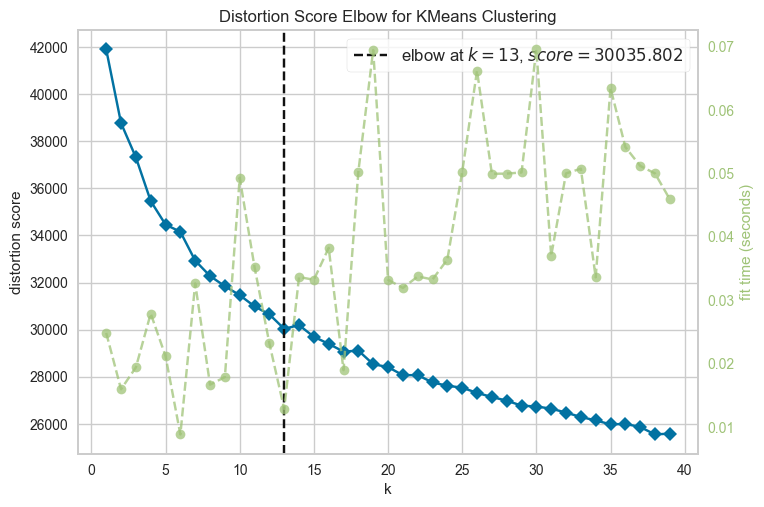

In [37]:
# mencari nilai optimal untuk model KMeans dengan Elbow Method
kmeans_base_elbow = KMeans()
visualizer = KElbowVisualizer(kmeans_base_elbow, k=(1,40))
visualizer.fit(ds_clustered) 
visualizer.show() 

plt.show()

Visualisasi di atas memperlihatkan bahwa nilai k yang terbaik adalah 13

In [38]:
# perbarui jumlah kluster Kmeans menggunakan hasil elbow method
kmeans_base_elbow = KMeans(n_clusters=13, random_state=42)
kmeans_base_elbow.fit(ds_clustered)

kmeans_labels = kmeans_base_elbow.labels_
score = silhouette_score(ds_clustered, kmeans_labels)
print(f'Silhouette Score KMeans Setelah Elbow Method: {score:.4}')

# Jumlah kluster dan noise pada KMeans
kmeans_clusters = len(set(kmeans_labels))
kmeans_noise = list(kmeans_labels).count(-1)
print(f'Jumlah kluster pada KMeans: {kmeans_clusters}')
print(f'Jumlah noise pada KMeans: {kmeans_noise}')

Silhouette Score KMeans Setelah Elbow Method: 0.05565
Jumlah kluster pada KMeans: 13
Jumlah noise pada KMeans: 0


Silhoutte score masih rendah. Saya akan melakukan feature selection berdasarkan features variancenya agar menghasilkan model prediksi yang baik.

## c. Feature Selection (Opsional)

In [39]:
features_variance = np.var(ds_clustered, axis=0).sort_values(ascending=False)
features_variance = pd.Series(features_variance, index=ds_clustered.columns).sort_values(ascending=False)

print(f'Feature variances: ')
features_variance

Feature variances: 


Parental_Education_Level          0.609193
Family_Income                     0.552745
Access_to_Resources               0.488015
Motivation_Level                  0.484004
Parental_Involvement              0.482977
Distance_from_Home                0.449421
Teacher_Quality                   0.361222
Gender_Male                       0.243879
Gender_Female                     0.243879
Extracurricular_Activities_Yes    0.240611
Extracurricular_Activities_No     0.240611
Peer_Influence_Positive           0.240056
Peer_Influence_Neutral            0.238160
Exam_Score_Binned                 0.220754
School_Type_Private               0.211896
School_Type_Public                0.211896
Peer_Influence_Negative           0.165045
Tutoring_Sessions_Binned          0.158264
Learning_Disabilities_No          0.093766
Learning_Disabilities_Yes         0.093766
Hours_Studied_Binned              0.092705
Attendance                        0.083374
Previous_Scores                   0.082935
Internet_Ac

In [40]:
ds_selected = ds_clustered.loc[:, features_variance > 0.5]
ds_selected

,Family_Income,Parental_Education_Level
0,0,0
1,1,1
2,1,2
3,1,0
4,1,1
...,...,...
6602,2,0
6603,0,0
6604,0,2
6605,0,0


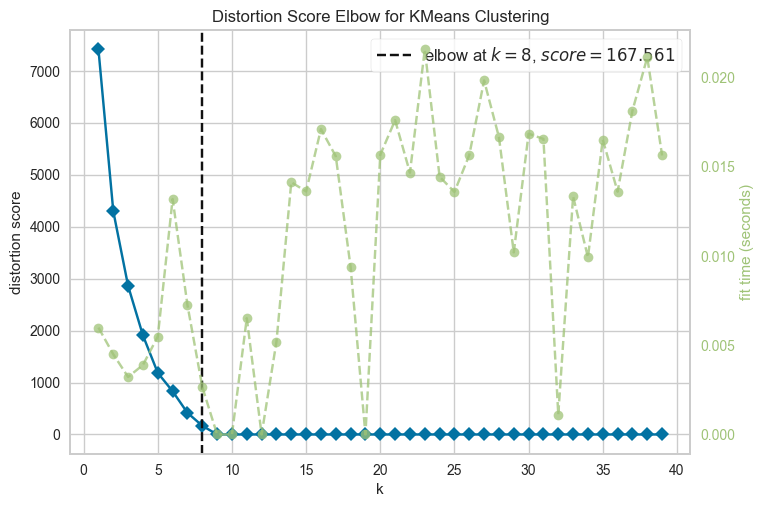

In [41]:
kmeans_selected_features_elbow = KMeans()
visualizer = KElbowVisualizer(kmeans_selected_features_elbow, k=(1,40))
visualizer.fit(ds_selected)  # Fit the data to the visualizer
visualizer.show()  # Finalize the plot
plt.show()

In [42]:
# perbarui jumlah kluster Kmeans menggunakan hasil elbow method
kmeans_selected_features_elbow = KMeans(n_clusters=8, random_state=42)
kmeans_selected_features_elbow.fit(ds_selected)

kmeans_labels_selected = kmeans_selected_features_elbow.labels_
score = silhouette_score(ds_selected, kmeans_labels_selected)
print(f'Silhouette Score KMeans Setelah Elbow Method: {score:.4}')

# Jumlah kluster dan noise pada KMeans
kmeans_clusters = len(set(kmeans_labels_selected))
kmeans_noise = list(kmeans_labels_selected).count(-1)
print(f'Jumlah kluster pada KMeans: {kmeans_clusters}')
print(f'Jumlah noise pada KMeans: {kmeans_noise}')

Silhouette Score KMeans Setelah Elbow Method: 0.9474
Jumlah kluster pada KMeans: 8
Jumlah noise pada KMeans: 0


In [43]:
pca = PCA(n_components=2, random_state=42)

pca.fit(ds_clustered)
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

np.float64(0.17834003634215273)

In [44]:
ds_reduced = pca.transform(ds_clustered)
ds_reduced = pd.DataFrame(ds_reduced, columns=['PCA1', 'PCA2'])
ds_reduced

,PCA1,PCA2
0,-0.774084,-0.836807
1,0.237104,-0.074365
2,1.323342,0.249642
3,-0.631304,0.115135
4,0.374626,0.319587
...,...,...
6373,-0.682584,1.426227
6374,-0.744477,-0.512889
6375,1.223954,-0.927633
6376,-0.616216,-0.726757


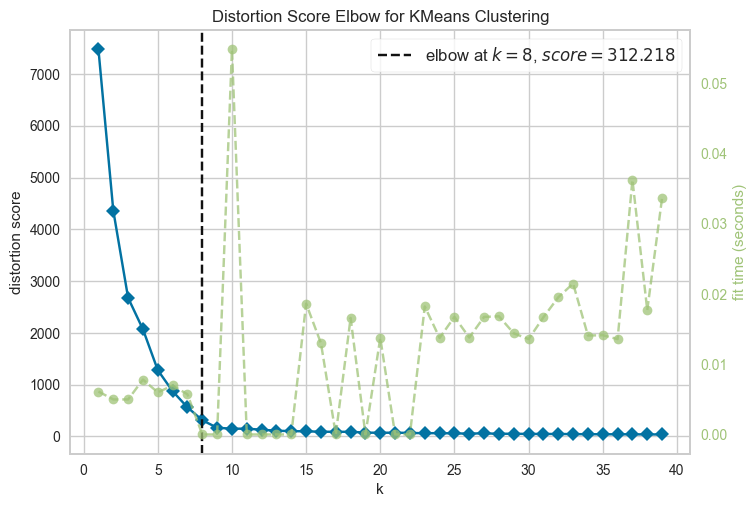

In [45]:
kmeans_reduced_PCA = KMeans()
visualizer = KElbowVisualizer(kmeans_reduced_PCA, k=(1,40))
visualizer.fit(ds_reduced)  # Fit the data to the visualizer
visualizer.show()  # Finalize the plot
plt.show()

In [46]:
# perbarui jumlah kluster Kmeans menggunakan hasil elbow method
kmeans_reduced_PCA = KMeans(n_clusters=8, random_state=42)
kmeans_reduced_PCA.fit(ds_reduced)

kmeans_labels_reduced = kmeans_reduced_PCA.labels_
score = silhouette_score(ds_reduced, kmeans_labels_reduced)
print(f'Silhouette Score KMeans Setelah Elbow Method: {score:.4}')

# Jumlah kluster dan noise pada KMeans
kmeans_clusters = len(set(kmeans_labels_reduced))
kmeans_noise = list(kmeans_labels_reduced).count(-1)
print(f'Jumlah kluster pada KMeans: {kmeans_clusters}')
print(f'Jumlah noise pada KMeans: {kmeans_noise}')

Silhouette Score KMeans Setelah Elbow Method: 0.7406
Jumlah kluster pada KMeans: 8
Jumlah noise pada KMeans: 0


In [47]:
kmeans_reduced_PCA = KMeans(n_clusters=8, random_state=42)
y_kmeans_reduced = kmeans_reduced_PCA.fit_predict(ds_reduced)
kmeans_reduced_cluster = ds_reduced.copy()
kmeans_reduced_cluster['cluster'] = y_kmeans_reduced
kmeans_reduced_cluster_mean = kmeans_reduced_cluster.groupby('cluster').mean()

kmeans_reduced_cluster_mean

,PCA1,PCA2
cluster,,
0,-0.741623,-0.739679
1,1.300370,0.155609
2,-0.646352,1.223833
3,0.306461,0.201604
4,1.256697,-0.836657
5,-0.694352,0.243441
6,0.252726,-0.795980
7,0.749937,1.164228


In [48]:
y_kmeans_selected = kmeans_selected_features_elbow.fit_predict(ds_selected)
kmeans_selected_cluster = ds_selected.copy()
kmeans_selected_cluster['cluster'] = y_kmeans_selected
kmeans_selected_cluster_mean = kmeans_selected_cluster.groupby('cluster').mean()

kmeans_selected_cluster_mean

,Family_Income,Parental_Education_Level
cluster,,
0,0.000000,0.0
1,1.321615,2.0
2,1.000000,0.0
3,0.000000,1.0
4,2.000000,0.0
5,0.000000,2.0
6,1.000000,1.0
7,2.000000,1.0


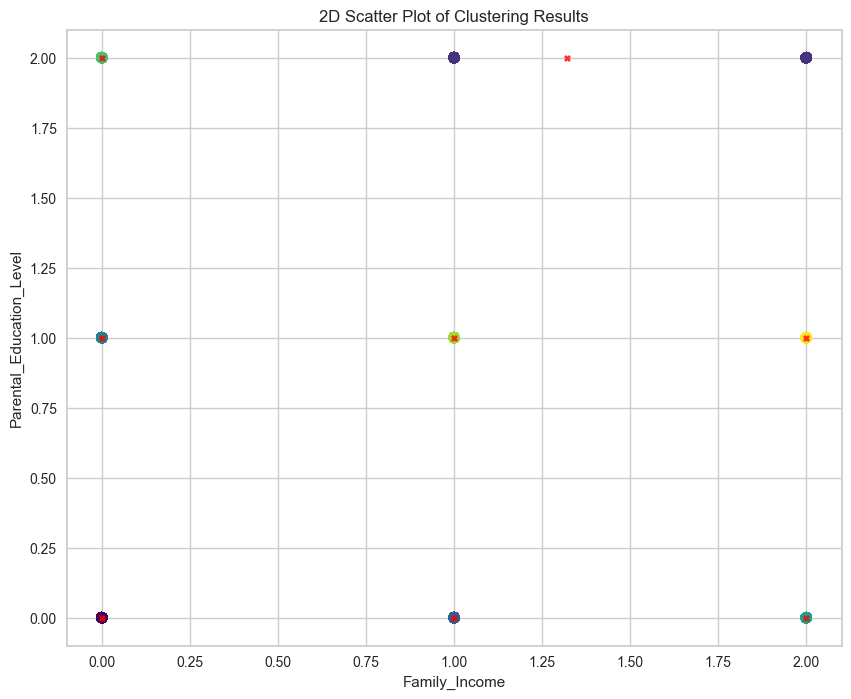

In [50]:
# Scatter plot 2D hasil clustering
plt.figure(figsize=(10, 8))

# Scatter plot data points
plt.scatter(ds_selected['Family_Income'], ds_selected['Parental_Education_Level'], 
            c=kmeans_labels_selected, cmap='viridis', alpha=0.5, label='Data Points', s=60,)

# Scatter plot centroids
plt.scatter(kmeans_selected_cluster_mean['Family_Income'], kmeans_selected_cluster_mean['Parental_Education_Level'], 
            c='red', marker='X', s=20, label='Centroids', alpha=0.8)

# Labeling axes and title
plt.xlabel('Family_Income')
plt.ylabel('Parental_Education_Level')
plt.title('2D Scatter Plot of Clustering Results')
# plt.legend()
plt.show()

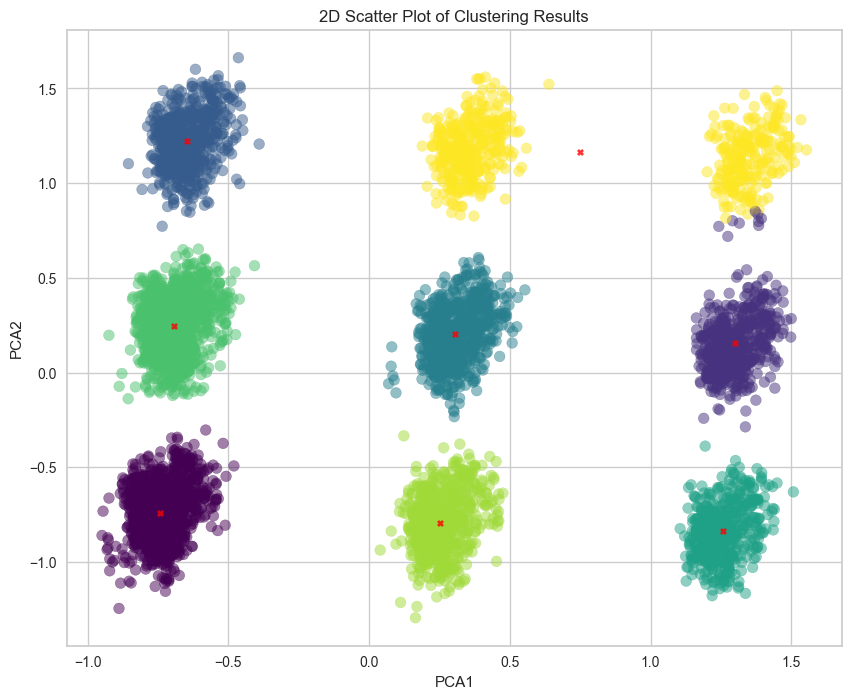

In [51]:
# Scatter plot 2D hasil clustering
plt.figure(figsize=(10, 8))

# Scatter plot data points
plt.scatter(ds_reduced['PCA1'], ds_reduced['PCA2'], 
            c=kmeans_labels_reduced, cmap='viridis', alpha=0.5, label='Data Points', s=60,)

# Scatter plot centroids
plt.scatter(kmeans_reduced_cluster_mean['PCA1'], kmeans_reduced_cluster_mean['PCA2'], 
            c='red', marker='X', s=20, label='Centroids', alpha=0.8)

# Labeling axes and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2D Scatter Plot of Clustering Results')
# plt.legend()
plt.show()

# Analisis dan Interpretasi Hasil ClusterIn

In [ ]:
#Interpretasi Target
